In [1]:
!pip install tensorflow
import numpy
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

In [2]:
gt=pd.read_csv("gas_turbines.csv")
gt=gt.iloc[:,[7,0,1,2]]
gt.shape

(15039, 4)

In [3]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEY     15039 non-null  float64
 1   AT      15039 non-null  float64
 2   AP      15039 non-null  float64
 3   AH      15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [4]:
gt.head()

,TEY,AT,AP,AH
0,114.70,6.8594,1007.9,96.799
1,114.72,6.7850,1008.4,97.118
2,114.71,6.8977,1008.8,95.939
3,114.72,7.0569,1009.2,95.249
4,114.72,7.3978,1009.7,95.150


In [5]:
gt.describe()

,TEY,AT,AP,AH
count,15039.000000,15039.000000,15039.00000,15039.000000
mean,134.188464,17.764381,1013.19924,79.124174
std,15.829717,7.574323,6.41076,13.793439
min,100.170000,0.522300,985.85000,30.344000
25%,127.985000,11.408000,1008.90000,69.750000
50%,133.780000,18.186000,1012.80000,82.266000
75%,140.895000,23.862500,1016.90000,90.043500
max,174.610000,34.929000,1034.20000,100.200000


In [6]:
x=gt.iloc[:,1:4]
y=gt.iloc[:,0]

In [7]:
x

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [8]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [9]:
# Here we have to take Loss function as mean_squared_error because it is a regression classifier
seed = 7
np.random.seed(seed)
model = Sequential()
model.add(Dense(12, input_dim=3,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(8,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history= model.fit(x, y,validation_split=0.33, epochs=150, batch_size=10)
print(history.history.keys())

Epoch 1/150
1008/1008 [==============================] - 1s 832us/step - loss: 18294.4629 - accuracy: 0.0000e+00 - val_loss: 17380.0859 - val_accuracy: 0.0000e+00
Epoch 2/150
1008/1008 [==============================] - 1s 726us/step - loss: 18290.0391 - accuracy: 0.0000e+00 - val_loss: 17380.0742 - val_accuracy: 0.0000e+00
Epoch 3/150
1008/1008 [==============================] - 1s 727us/step - loss: 18290.0371 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 4/150
1008/1008 [==============================] - 1s 718us/step - loss: 18290.0312 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 5/150
1008/1008 [==============================] - 1s 713us/step - loss: 18290.0137 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 6/150
1008/1008 [==============================] - 1s 746us/step - loss: 18290.0332 - accuracy: 0.0000e+00 - val_loss: 17380.0723 - val_accuracy: 0.0000e+00
Epoch 7/150
1008/1008 

In [10]:
#evaluate the model

scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 0s 496us/step - loss: 17989.7324 - accuracy: 0.0000e+00
accuracy: 0.00%


In [11]:
history

In [12]:
# Visualize training history

# list all data in history
history.history.keys()
history

In [13]:
s = StandardScaler()
s.fit(x)
X_standardized = s.transform(x)
pd.DataFrame(X_standardized).describe()

,0,1,2
count,1.503900e+04,1.503900e+04,1.503900e+04
mean,-2.320107e-16,-1.925280e-14,1.844983e-16
std,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01
max,2.266234e+00,3.275970e+00,1.528011e+00


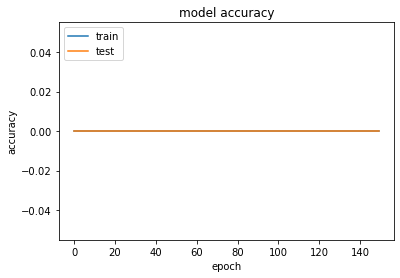

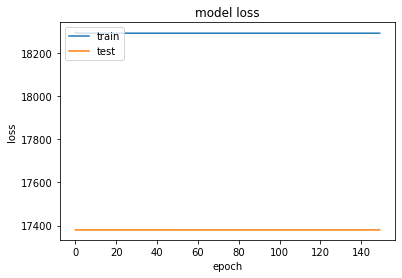

In [14]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
s = StandardScaler()
s.fit(x)
X_standardized = s.transform(x)
pd.DataFrame(X_standardized).describe()

,0,1,2
count,1.503900e+04,1.503900e+04,1.503900e+04
mean,-2.320107e-16,-1.925280e-14,1.844983e-16
std,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01
max,2.266234e+00,3.275970e+00,1.528011e+00


In [16]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=3, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))\
    
    adam=Adam(lr=0.01)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
    return model

In [17]:
model = KerasRegressor(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

C:\Users\dalwe\AppData\Local\Temp/ipykernel_24596/621659432.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0)
C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END batch_size=10, epochs=10;, score=-18533.189 total time=   5.9s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END batch_size=10, epochs=10;, score=-16715.723 total time=   5.9s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END batch_size=10, epochs=10;, score=-19193.920 total time=   5.7s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END batch_size=10, epochs=10;, score=-18239.473 total time=   5.9s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END batch_size=10, epochs=10;, score=-17266.104 total time=   5.8s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END batch_size=10, epochs=50;, score=-18533.189 total time=  26.8s
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END batch_size=10, epochs=50;, score=-16715.723 total time=  27.9s
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END batch_size=10, epochs=50;, score=-19193.920 total time=  27.3s
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END batch_size=10, epochs=50;, score=-18239.473 total time=  27.6s
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END batch_size=10, epochs=50;, score=-17266.104 total time=  27.3s
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END batch_size=10, epochs=100;, score=-18533.189 total time=  54.1s
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END batch_size=10, epochs=100;, score=-16715.723 total time=  54.9s
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END batch_size=10, epochs=100;, score=-19193.920 total time=  54.6s
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END batch_size=10, epochs=100;, score=-18239.473 total time=  55.2s
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END batch_size=10, epochs=100;, score=-17266.104 total time=  54.3s
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END batch_size=20, epochs=10;, score=-18533.182 total time=   3.0s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END batch_size=20, epochs=10;, score=-16715.725 total time=   3.1s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END batch_size=20, epochs=10;, score=-19193.922 total time=   3.1s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END batch_size=20, epochs=10;, score=-18239.480 total time=   3.1s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END batch_size=20, epochs=10;, score=-17266.104 total time=   3.0s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END batch_size=20, epochs=50;, score=-18533.182 total time=  13.8s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END batch_size=20, epochs=50;, score=-16715.725 total time=  14.0s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END batch_size=20, epochs=50;, score=-19193.922 total time=  14.0s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END batch_size=20, epochs=50;, score=-18239.480 total time=  14.2s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END batch_size=20, epochs=50;, score=-17266.104 total time=  13.7s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END batch_size=20, epochs=100;, score=-18533.182 total time=  27.7s
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END batch_size=20, epochs=100;, score=-16715.725 total time=  27.2s
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END batch_size=20, epochs=100;, score=-19193.922 total time=  28.6s
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END batch_size=20, epochs=100;, score=-18239.480 total time=  29.1s
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END batch_size=20, epochs=100;, score=-17266.104 total time=  29.0s
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END batch_size=40, epochs=10;, score=-18533.189 total time=   1.6s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END batch_size=40, epochs=10;, score=-16715.727 total time=   1.6s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END batch_size=40, epochs=10;, score=-19193.918 total time=   1.6s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END batch_size=40, epochs=10;, score=-18239.473 total time=   1.6s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END batch_size=40, epochs=10;, score=-17266.104 total time=   1.6s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END batch_size=40, epochs=50;, score=-18533.189 total time=   7.2s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END batch_size=40, epochs=50;, score=-16715.727 total time=   7.2s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END batch_size=40, epochs=50;, score=-19193.918 total time=   7.7s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END batch_size=40, epochs=50;, score=-18239.473 total time=   7.2s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END batch_size=40, epochs=50;, score=-17266.104 total time=   7.1s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END batch_size=40, epochs=100;, score=-18533.189 total time=  14.2s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END batch_size=40, epochs=100;, score=-16715.727 total time=  13.9s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END batch_size=40, epochs=100;, score=-19193.918 total time=  14.1s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END batch_size=40, epochs=100;, score=-18239.473 total time=  14.1s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END batch_size=40, epochs=100;, score=-17266.104 total time=  14.6s


In [18]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -17989.681640625, using {'batch_size': 10, 'epochs': 10}
-17989.681640625,889.3281653711138 with: {'batch_size': 10, 'epochs': 10}
-17989.681640625,889.3281653711138 with: {'batch_size': 10, 'epochs': 50}
-17989.681640625,889.3281653711138 with: {'batch_size': 10, 'epochs': 100}
-17989.682421875,889.3276187173044 with: {'batch_size': 20, 'epochs': 10}
-17989.682421875,889.3276187173044 with: {'batch_size': 20, 'epochs': 50}
-17989.682421875,889.3276187173044 with: {'batch_size': 20, 'epochs': 100}
-17989.68203125,889.3265172893153 with: {'batch_size': 40, 'epochs': 10}
-17989.68203125,889.3265172893153 with: {'batch_size': 40, 'epochs': 50}
-17989.68203125,889.3265172893153 with: {'batch_size': 40, 'epochs': 100}


# Tuning : Learning Rate & Drop Out Rate

In [19]:
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['accuracy'])
    return model

In [20]:
# Define Regression Model
model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\dalwe\AppData\Local\Temp/ipykernel_24596/2508637395.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-18533.229 total time=   1.6s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-16715.752 total time=   1.6s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-19193.990 total time=   1.6s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-18261.832 total time=   1.8s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-17266.168 total time=   1.7s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-18533.189 total time=   1.7s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-16715.727 total time=   1.7s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-19193.918 total time=   1.7s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-18239.473 total time=   1.7s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=-17266.104 total time=   1.6s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-18533.189 total time=   1.7s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-16715.727 total time=   1.6s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-19193.918 total time=   1.6s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-18239.473 total time=   1.7s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=-17266.104 total time=   1.7s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-18533.195 total time=   1.9s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-16715.727 total time=   1.7s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-19193.961 total time=   1.7s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-18239.475 total time=   1.7s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=-17266.105 total time=   1.7s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-18533.189 total time=   1.7s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-16716.189 total time=   1.8s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-19193.918 total time=   1.7s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-18239.953 total time=   1.7s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=-17266.104 total time=   1.7s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-18533.189 total time=   1.8s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-16715.727 total time=   1.9s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-19193.918 total time=   1.7s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-18239.473 total time=   1.7s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=-17266.104 total time=   1.8s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-18533.244 total time=   1.7s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-16715.795 total time=   1.8s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-19193.918 total time=   1.7s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-18261.832 total time=   1.7s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=-17266.105 total time=   1.7s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-18533.670 total time=   1.7s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-16716.188 total time=   1.7s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-19193.918 total time=   1.7s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-18239.473 total time=   1.9s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=-17266.574 total time=   1.7s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-18533.189 total time=   1.7s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-16715.727 total time=   1.7s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-19193.918 total time=   1.7s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-18239.473 total time=   1.8s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=-17266.104 total time=   1.7s


In [21]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -17989.68203125, using {'dropout_rate': 0.0, 'learning_rate': 0.01}
-17994.194140625,890.6329545017242 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-17989.68203125,889.3265172893153 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-17989.68203125,889.3265172893153 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-17989.692578125,889.3386622228157 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-17989.870703125,889.22091383353 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-17989.68203125,889.3265172893153 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-17994.17890625,890.6132586282314 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-17989.964453125,889.1766084937959 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-17989.68203125,889.3265172893153 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


# Tuning : Activation function and Kernal intitilizer

In [22]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 3,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 3,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['accuracy'])
    return model

In [23]:
#Define Regression  Model
model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\dalwe\AppData\Local\Temp/ipykernel_24596/2911985988.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=-18537.111 total time=   1.8s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=-16719.506 total time=   1.8s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=-19197.836 total time=   1.8s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=-18243.936 total time=   2.0s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=-17270.955 total time=   1.8s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=-18537.479 total time=   1.8s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=-16720.115 total time=   1.8s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=-19198.541 total time=   1.8s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=-18244.842 total time=   1.8s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=-17270.428 total time=   1.8s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=-18537.318 total time=   1.8s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=-16718.949 total time=   1.8s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=-19197.760 total time=   1.8s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=-18244.410 total time=   1.8s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=-17270.539 total time=   2.0s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=-18533.193 total time=   1.7s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=-16715.727 total time=   1.7s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=-19193.918 total time=   1.7s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=-18261.826 total time=   1.7s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=-17266.105 total time=   1.7s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=-18533.240 total time=   1.8s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=-16715.727 total time=   1.7s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=-19193.918 total time=   1.7s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=-18239.475 total time=   1.7s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=-17266.105 total time=   1.7s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=-18555.660 total time=   1.9s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=-16737.205 total time=   1.7s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=-19216.816 total time=   1.8s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=-18261.836 total time=   1.8s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=-17287.842 total time=   1.7s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=-18533.383 total time=   1.7s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=-16715.928 total time=   1.8s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=-19194.090 total time=   1.8s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=-18239.678 total time=   1.7s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=-17266.480 total time=   1.7s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=-18533.338 total time=   1.7s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=-16716.010 total time=   1.9s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=-19194.068 total time=   1.7s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=-18239.672 total time=   1.7s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=-17266.238 total time=   1.8s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=-18533.607 total time=   1.7s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=-16716.176 total time=   1.7s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=-19194.391 total time=   1.7s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=-18239.922 total time=   1.8s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=-17266.480 total time=   1.7s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=-18533.195 total time=   1.7s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=-16715.727 total time=   1.7s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=-19193.918 total time=   1.9s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=-18239.475 total time=   1.7s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=-17266.105 total time=   1.7s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=-18533.195 total time=   1.7s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=-16715.727 total time=   1.7s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=-19193.918 total time=   1.7s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=-18239.473 total time=   1.7s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=-17266.105 total time=   1.7s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=-18533.355 total time=   1.7s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=-16715.898 total time=   1.7s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=-19194.098 total time=   1.7s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=-18239.662 total time=   1.9s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=-17266.275 total time=   1.7s


# Tuning : Number of neurons in activation layer

In [24]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 3,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['accuracy'])
    return model

In [25]:
#Define Regression Model
model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

C:\Users\dalwe\AppData\Local\Temp/ipykernel_24596/3859861013.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END ....neuron1=4, neuron2=2;, score=-18533.869 total time=   1.7s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END ....neuron1=4, neuron2=2;, score=-16716.654 total time=   1.7s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END ....neuron1=4, neuron2=2;, score=-19195.367 total time=   1.7s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END ....neuron1=4, neuron2=2;, score=-18239.873 total time=   1.7s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END ....neuron1=4, neuron2=2;, score=-17267.000 total time=   1.7s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END ....neuron1=4, neuron2=4;, score=-18533.391 total time=   1.7s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END ....neuron1=4, neuron2=4;, score=-16715.930 total time=   1.7s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END ....neuron1=4, neuron2=4;, score=-19194.102 total time=   1.7s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END ....neuron1=4, neuron2=4;, score=-18239.736 total time=   1.7s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END ....neuron1=4, neuron2=4;, score=-17266.246 total time=   1.9s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END ....neuron1=4, neuron2=8;, score=-18533.240 total time=   1.7s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END ....neuron1=4, neuron2=8;, score=-16715.766 total time=   1.7s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END ....neuron1=4, neuron2=8;, score=-19193.965 total time=   1.7s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END ....neuron1=4, neuron2=8;, score=-18239.506 total time=   1.7s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END ....neuron1=4, neuron2=8;, score=-17266.145 total time=   1.7s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END ....neuron1=8, neuron2=2;, score=-18534.385 total time=   1.7s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END ....neuron1=8, neuron2=2;, score=-16716.533 total time=   1.7s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END ....neuron1=8, neuron2=2;, score=-19195.006 total time=   1.7s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END ....neuron1=8, neuron2=2;, score=-18240.510 total time=   1.7s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END ....neuron1=8, neuron2=2;, score=-17266.629 total time=   1.8s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END ....neuron1=8, neuron2=4;, score=-18533.539 total time=   1.7s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END ....neuron1=8, neuron2=4;, score=-16715.855 total time=   2.0s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END ....neuron1=8, neuron2=4;, score=-19194.098 total time=   1.8s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END ....neuron1=8, neuron2=4;, score=-18239.639 total time=   1.7s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END ....neuron1=8, neuron2=4;, score=-17266.326 total time=   1.7s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END ....neuron1=8, neuron2=8;, score=-18533.252 total time=   1.7s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END ....neuron1=8, neuron2=8;, score=-16715.773 total time=   1.7s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END ....neuron1=8, neuron2=8;, score=-19193.980 total time=   1.7s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END ....neuron1=8, neuron2=8;, score=-18239.527 total time=   1.8s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END ....neuron1=8, neuron2=8;, score=-17266.148 total time=   1.8s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END ...neuron1=16, neuron2=2;, score=-18533.689 total time=   1.7s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END ...neuron1=16, neuron2=2;, score=-16717.477 total time=   1.8s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END ...neuron1=16, neuron2=2;, score=-19194.742 total time=   1.9s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END ...neuron1=16, neuron2=2;, score=-18240.252 total time=   1.7s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END ...neuron1=16, neuron2=2;, score=-17266.711 total time=   1.7s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END ...neuron1=16, neuron2=4;, score=-18533.361 total time=   1.7s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END ...neuron1=16, neuron2=4;, score=-16715.912 total time=   1.8s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END ...neuron1=16, neuron2=4;, score=-19194.031 total time=   1.8s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END ...neuron1=16, neuron2=4;, score=-18239.727 total time=   1.8s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END ...neuron1=16, neuron2=4;, score=-17266.301 total time=   1.8s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END ...neuron1=16, neuron2=8;, score=-18533.260 total time=   1.7s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END ...neuron1=16, neuron2=8;, score=-16715.785 total time=   1.8s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END ...neuron1=16, neuron2=8;, score=-19193.980 total time=   1.8s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END ...neuron1=16, neuron2=8;, score=-18239.533 total time=   1.9s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\dalwe\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END ...neuron1=16, neuron2=8;, score=-17266.154 total time=   1.8s


In [26]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -17989.72421875, using {'neuron1': 4, 'neuron2': 8}
-17990.552734375,889.4129513865746 with: {'neuron1': 4, 'neuron2': 2}
-17989.880859375,889.3342436645211 with: {'neuron1': 4, 'neuron2': 4}
-17989.72421875,889.3294184818872 with: {'neuron1': 4, 'neuron2': 8}
-17990.6125,889.508918795203 with: {'neuron1': 8, 'neuron2': 2}
-17989.89140625,889.3540781724676 with: {'neuron1': 8, 'neuron2': 4}
-17989.736328125,889.3334153718163 with: {'neuron1': 8, 'neuron2': 8}
-17990.57421875,889.0544773080675 with: {'neuron1': 16, 'neuron2': 2}
-17989.86640625,889.3072093395583 with: {'neuron1': 16, 'neuron2': 4}
-17989.742578125,889.3303885705781 with: {'neuron1': 16, 'neuron2': 8}


In [27]:
from sklearn.metrics import classification_report, accuracy_score
def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 3,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim = 3,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'linear'))
    
    adam = Adam(lr = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['accuracy'])
    return model

In [28]:
#Define Regression Model
model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)

# Fitting the model

model.fit(X_standardized,y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(y_predict.round(),y.round()))

C:\Users\dalwe\AppData\Local\Temp/ipykernel_24596/1198964907.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)


0.039696788350289246
